In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

class SimpleWord2Vec:
    def __init__(self, sentences, window_size=2, embedding_size=10, learning_rate=0.01, epochs=1000):
        self.sentences = sentences
        self.window_size = window_size
        self.embedding_size = embedding_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        self.build_vocab()
        self.generate_training_pairs()
        self.initialize_weights()

    def build_vocab(self):
        words = " ".join(self.sentences).split()
        self.vocab = list(set(words))
        self.vocab_size = len(self.vocab)
        self.word_to_idx = {word: i for i, word in enumerate(self.vocab)}
        self.idx_to_word = {i: word for i, word in enumerate(self.vocab)}

    def generate_training_pairs(self):
        self.training_pairs = []
        for sentence in self.sentences:
            tokens = sentence.split()
            for i, center in enumerate(tokens):
                for j in range(max(0, i - self.window_size), min(len(tokens), i + self.window_size + 1)):
                    if i != j:
                        self.training_pairs.append((center, tokens[j]))

    def initialize_weights(self):
        self.W1 = np.random.rand(self.vocab_size, self.embedding_size)
        self.W2 = np.random.rand(self.embedding_size, self.vocab_size)

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)

    def train(self):
        for epoch in range(self.epochs):
            total_loss = 0
            for center, context in self.training_pairs:
                x = np.zeros(self.vocab_size)
                x[self.word_to_idx[center]] = 1

                h = np.dot(self.W1.T, x)
                u = np.dot(self.W2.T, h)
                y_pred = self.softmax(u)

                y_true = np.zeros(self.vocab_size)
                y_true[self.word_to_idx[context]] = 1

                loss = -np.log(y_pred[self.word_to_idx[context]] + 1e-7)
                total_loss += loss

                error = y_pred - y_true
                dW2 = np.outer(h, error)
                dW1 = np.outer(x, np.dot(self.W2, error))

                self.W1 -= self.learning_rate * dW1
                self.W2 -= self.learning_rate * dW2

            if (epoch + 1) % 200 == 0:
                print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {total_loss:.4f}")

    def get_embedding(self, word):
        if word in self.word_to_idx:
            return self.W1[self.word_to_idx[word]]
        else:
            raise ValueError(f"'{word}' not in vocabulary!")

    def get_all_embeddings(self):
        return self.W1

    def plot_embeddings(self):
        embeddings = self.get_all_embeddings()
        tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=1000)
        reduced = tsne.fit_transform(embeddings)

        plt.figure(figsize=(10, 6))
        for i, label in enumerate(self.vocab):
            x, y = reduced[i, 0], reduced[i, 1]
            plt.scatter(x, y)
            plt.annotate(label, (x, y), fontsize=8)
        plt.title("Word Embeddings Visualized with t-SNE")
        plt.grid(True)
        plt.show()


sentences = [
    "The lion prowled silently across the savanna at dusk.",
    "A zebra grazed peacefully near the savanna’s watering hole.",
    "The elephant trudged slowly through the savanna with its herd.",
    "A giraffe stretched its neck to nibble leaves in the savanna.",
    "The cheetah sprinted across the savanna chasing its prey.",
    "A hyena cackled loudly in the savanna under the moonlight.",
    "The rhinoceros charged through the savanna to protect its territory.",
    "A leopard leapt onto a low branch in the savanna’s sparse trees.",
    "The buffalo roamed in a tight herd across the savanna’s grasslands.",
    "A wildebeest migrated through the savanna in search of fresh grass."
]


model = SimpleWord2Vec(sentences, window_size=5, embedding_size=100, learning_rate=0.01, epochs=1000)
model.train()

Epoch 200/1000, Loss: 1990.8971
Epoch 400/1000, Loss: 1976.7007
Epoch 600/1000, Loss: 1968.5643
Epoch 800/1000, Loss: 1963.1864
Epoch 1000/1000, Loss: 1959.3421


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


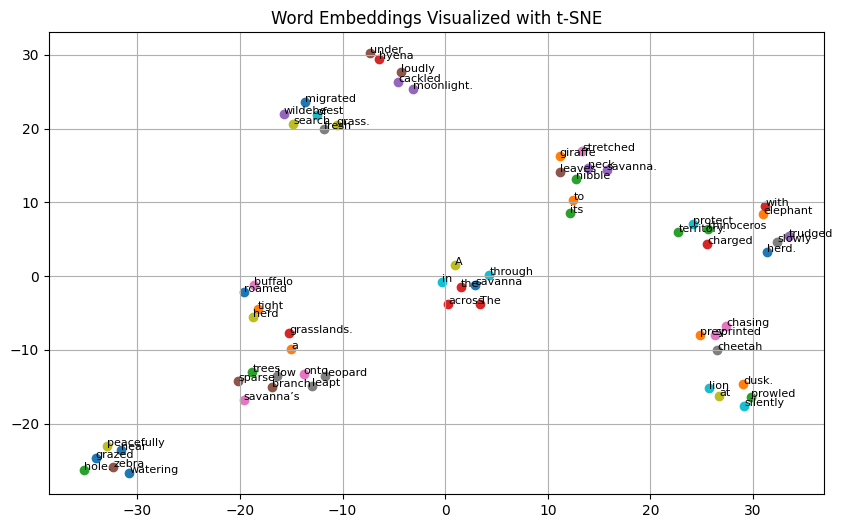

In [15]:

model.plot_embeddings()
